In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((5,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0886070701PNS003SRSPEC0002.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.038e-03 +/- 8.486e-04 (72.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.75e+04 sec
 Using fit statistic: chi
 Using Background File                P0886070701PNS003BGSPEC0002.FTZ
  Background Exposure Time: 1.75e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886070701PNS003SRCARF0002.FTZ



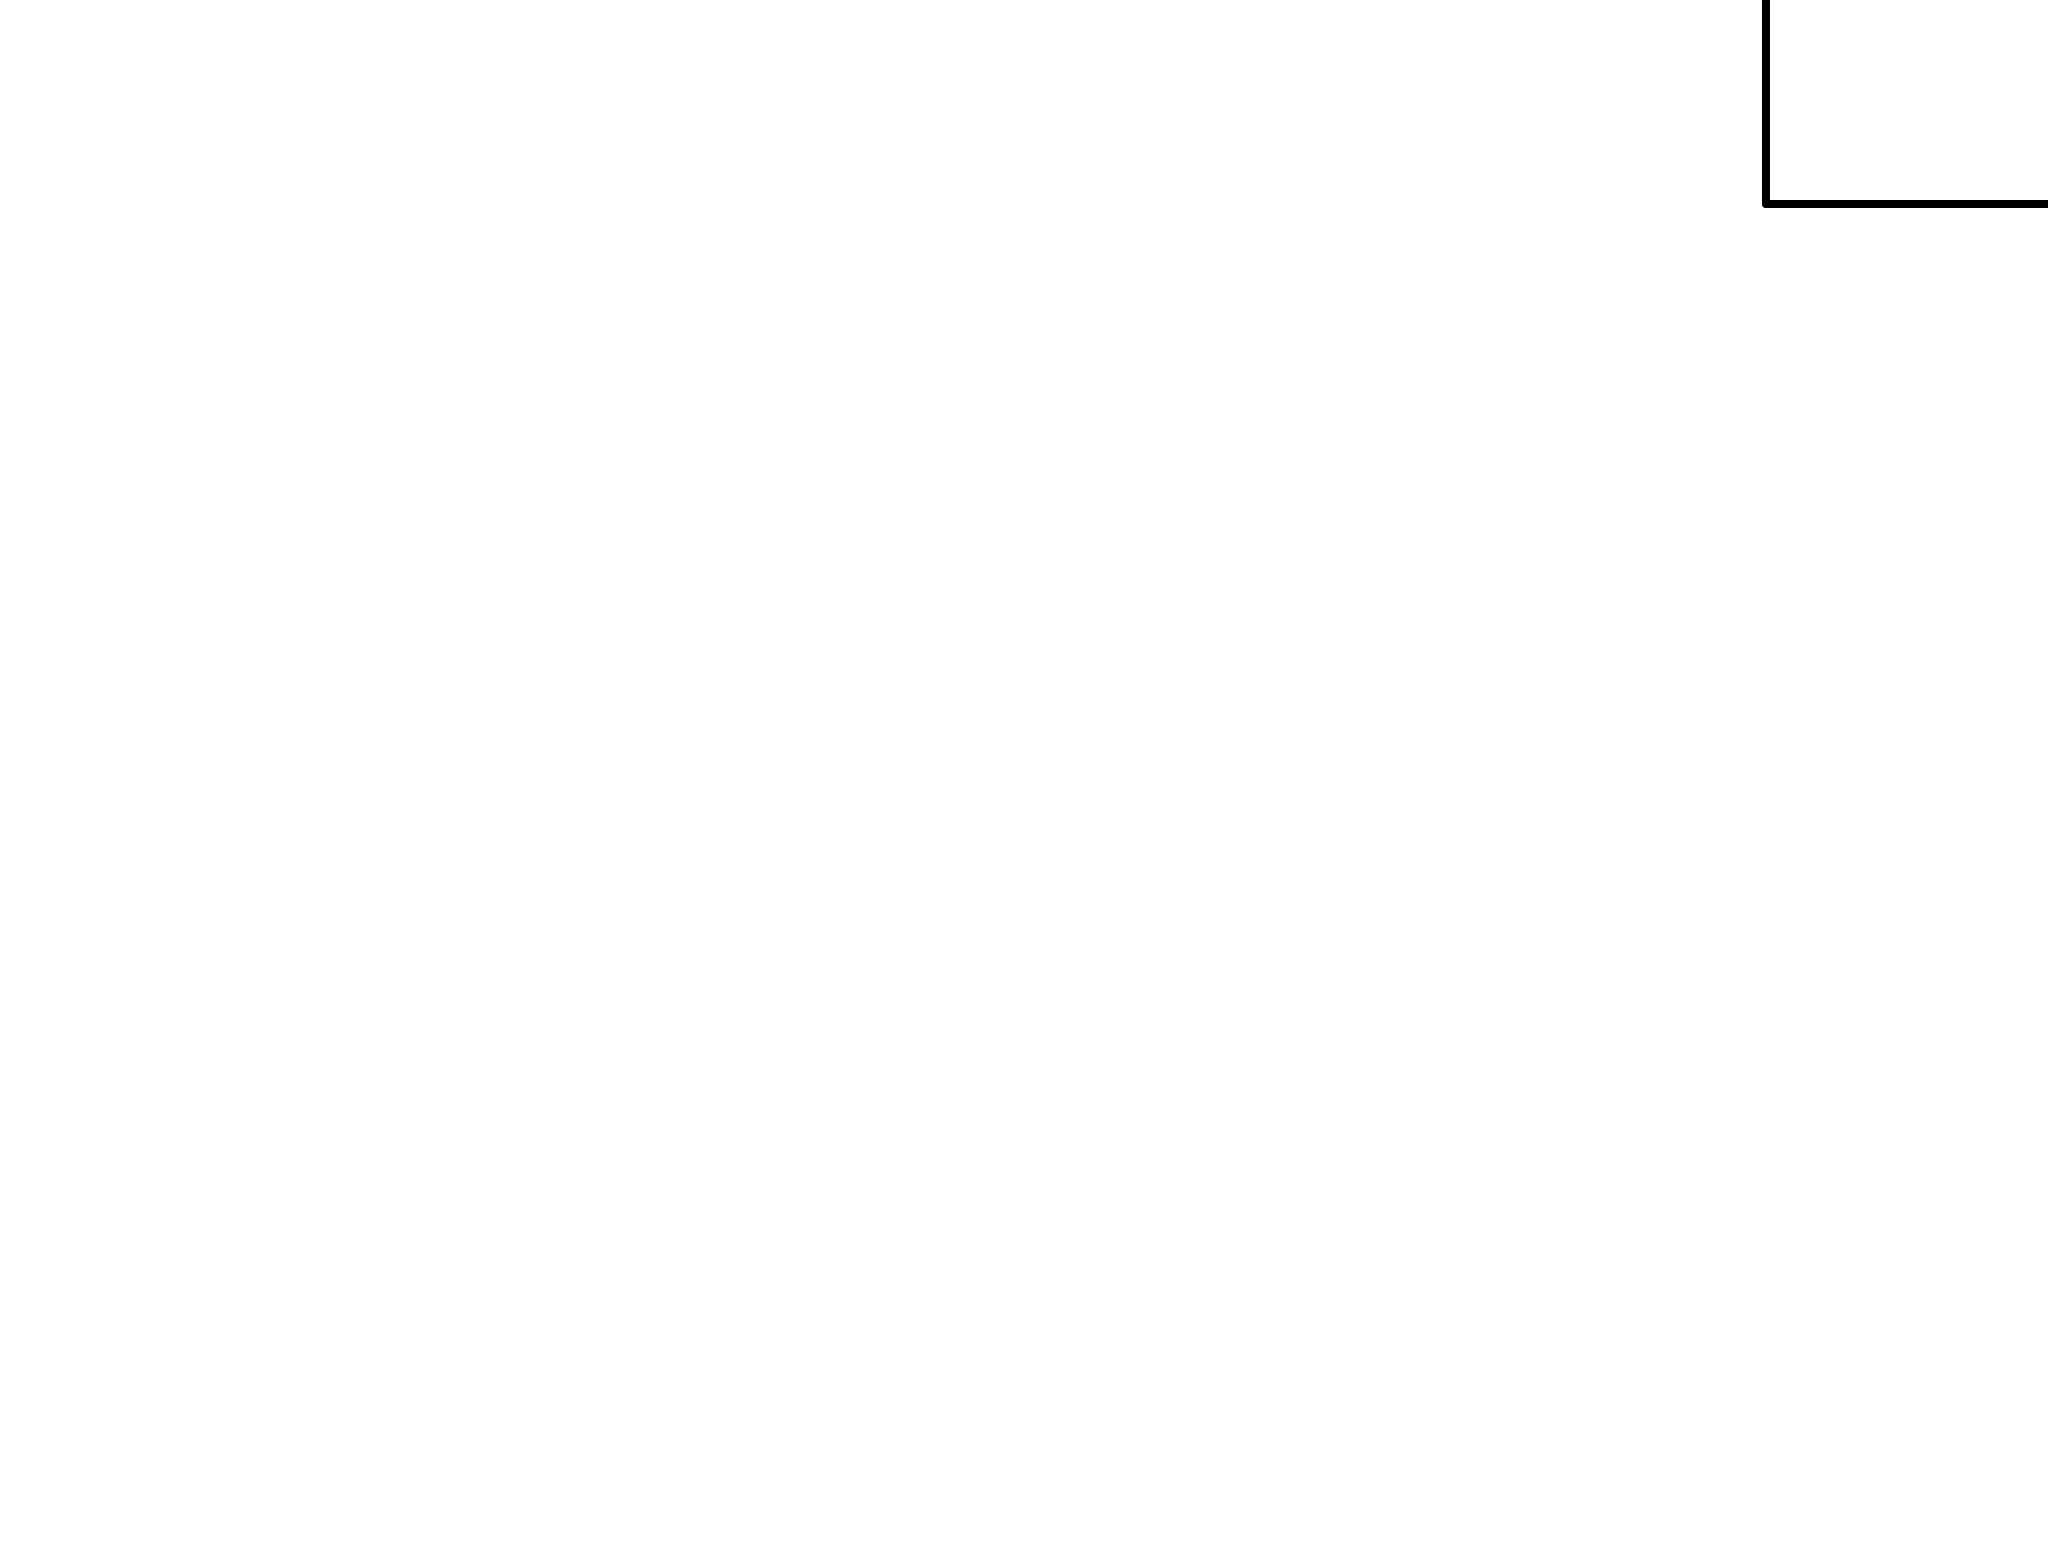

      No channels ignored (no channels in specified range)
     1 channels (10) ignored in spectrum #     1



In [3]:
spec_fnames = glob.glob('P*70701PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              2.144793e+11     using 9 bins.



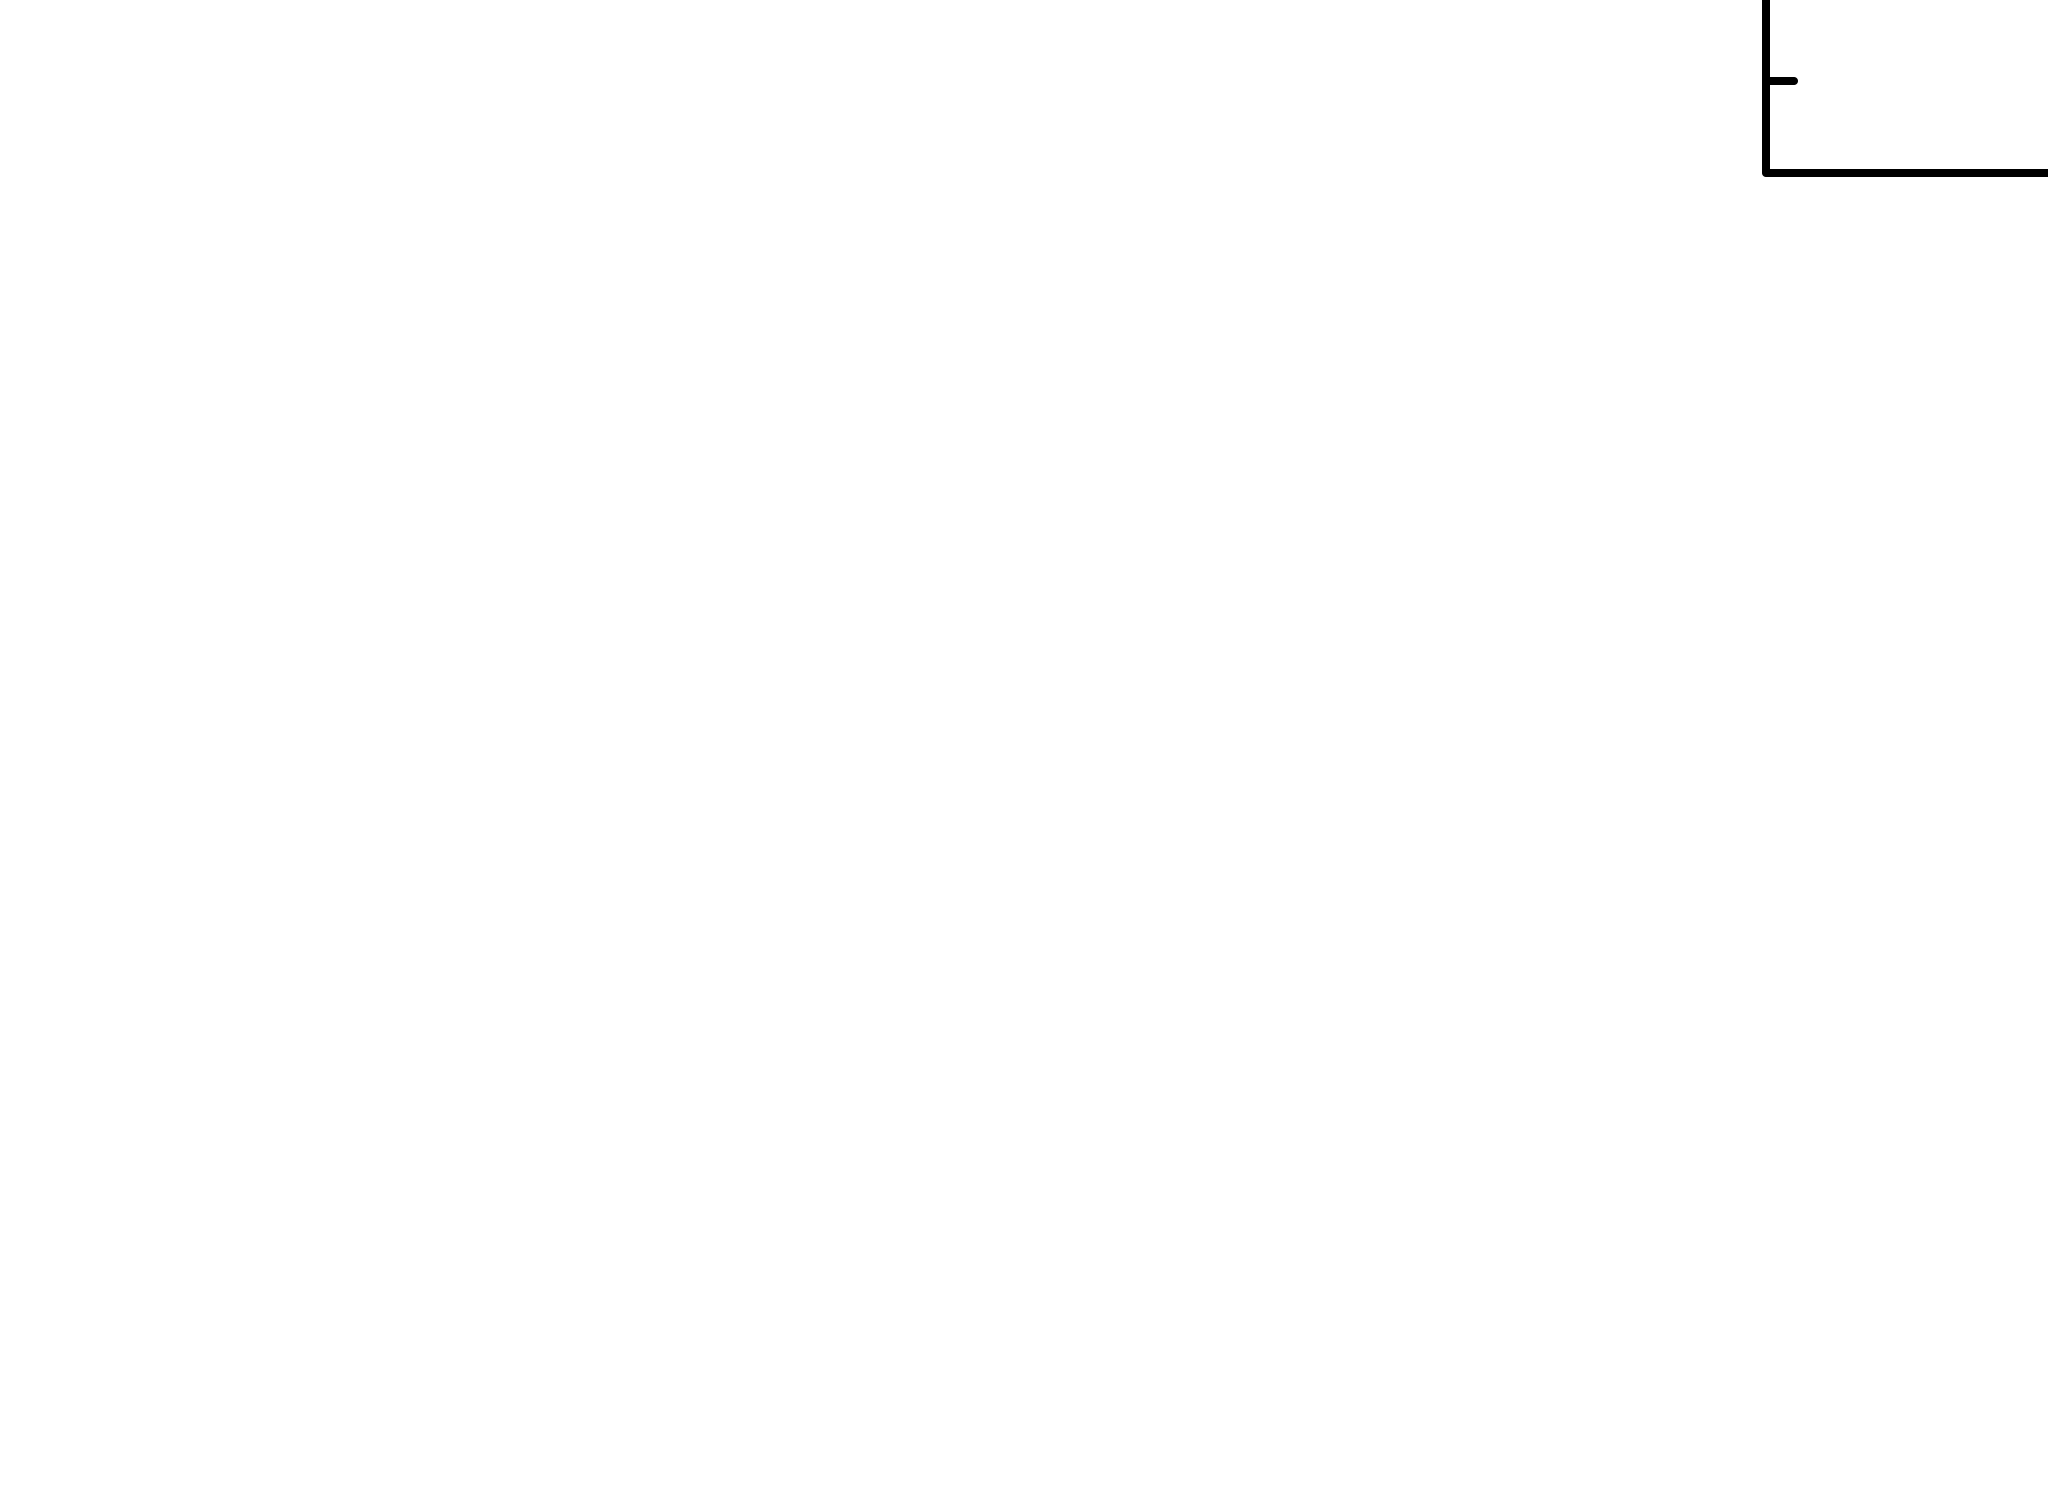

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.746817      4.04838    (-1.23652,2.06504)
 Parameter   Confidence Range (2.706)
     2      1.18438      3.68784    (-1.07527,1.42819)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.799154e+10     using 9 bins.

Test statistic : Chi-Squared              3.799154e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.45157      1.94078      -3       1.21204       7.39284   5.80628e-05
6.43693      663.021      -2       1.38131       5.01868   6.53620e-05
6.0051       25435.1      -3       1.51413       4.65020   7.40422e-05
5.9

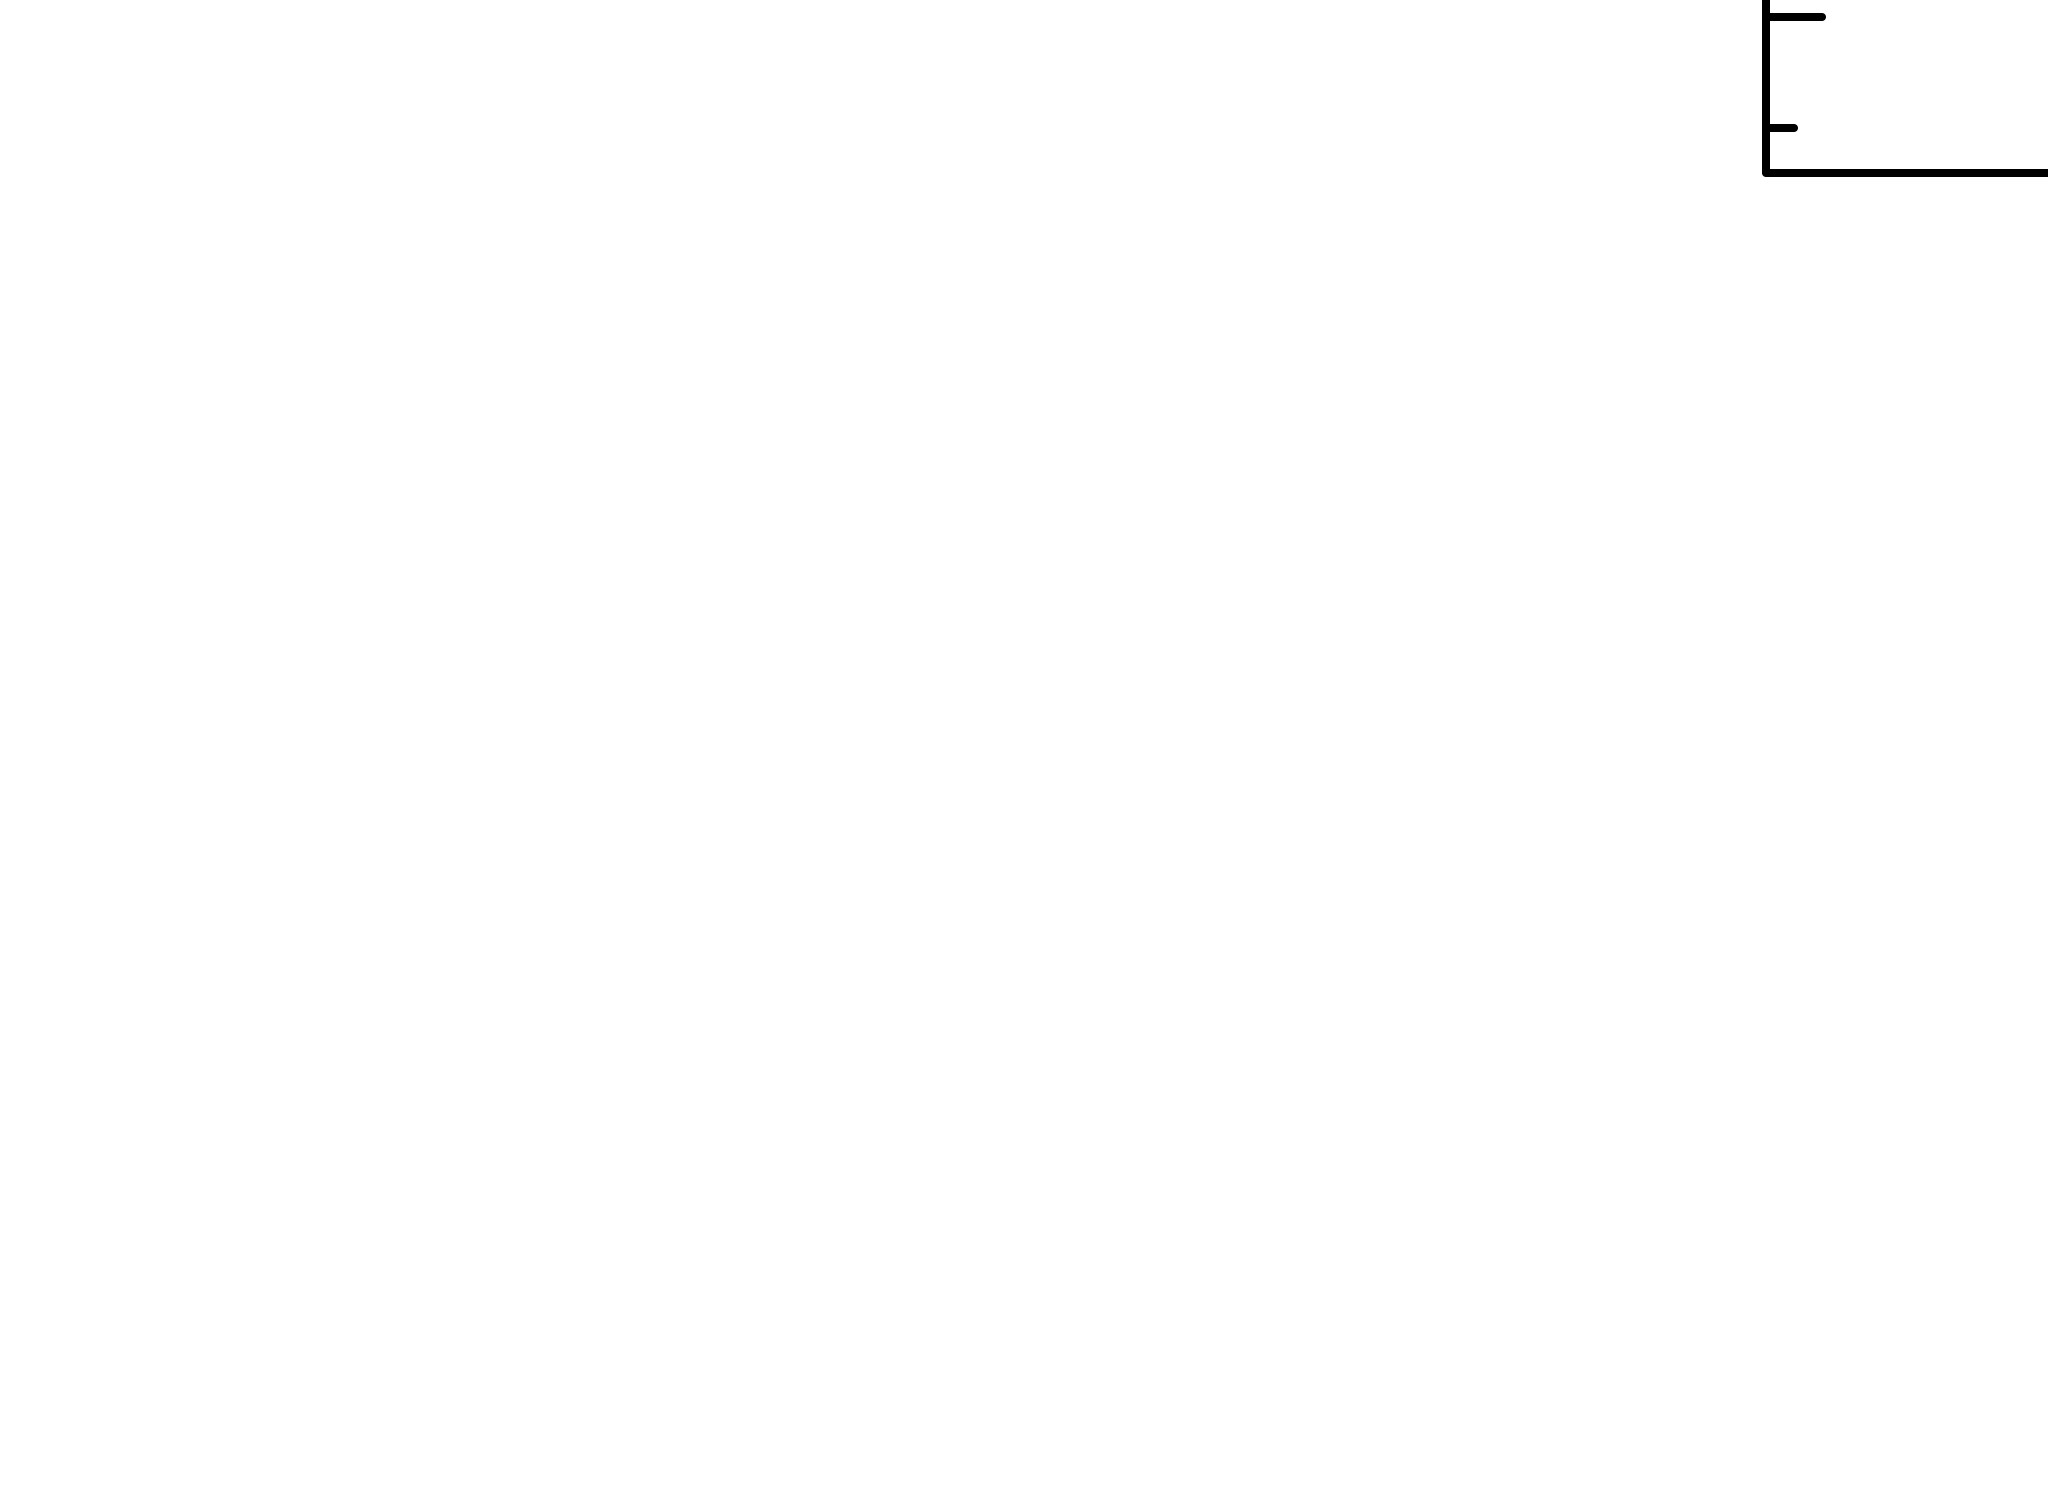

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.751354      3.04011    (-0.897146,1.39161)
 Parameter   Confidence Range (2.706)
     2      1.64771      173.191    (-2.38504,169.158)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.342778e+10     using 9 bins.

Test statistic : Chi-Squared              1.342778e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
75.2454      10.4748      -2      0.148555       3.63707   2.0

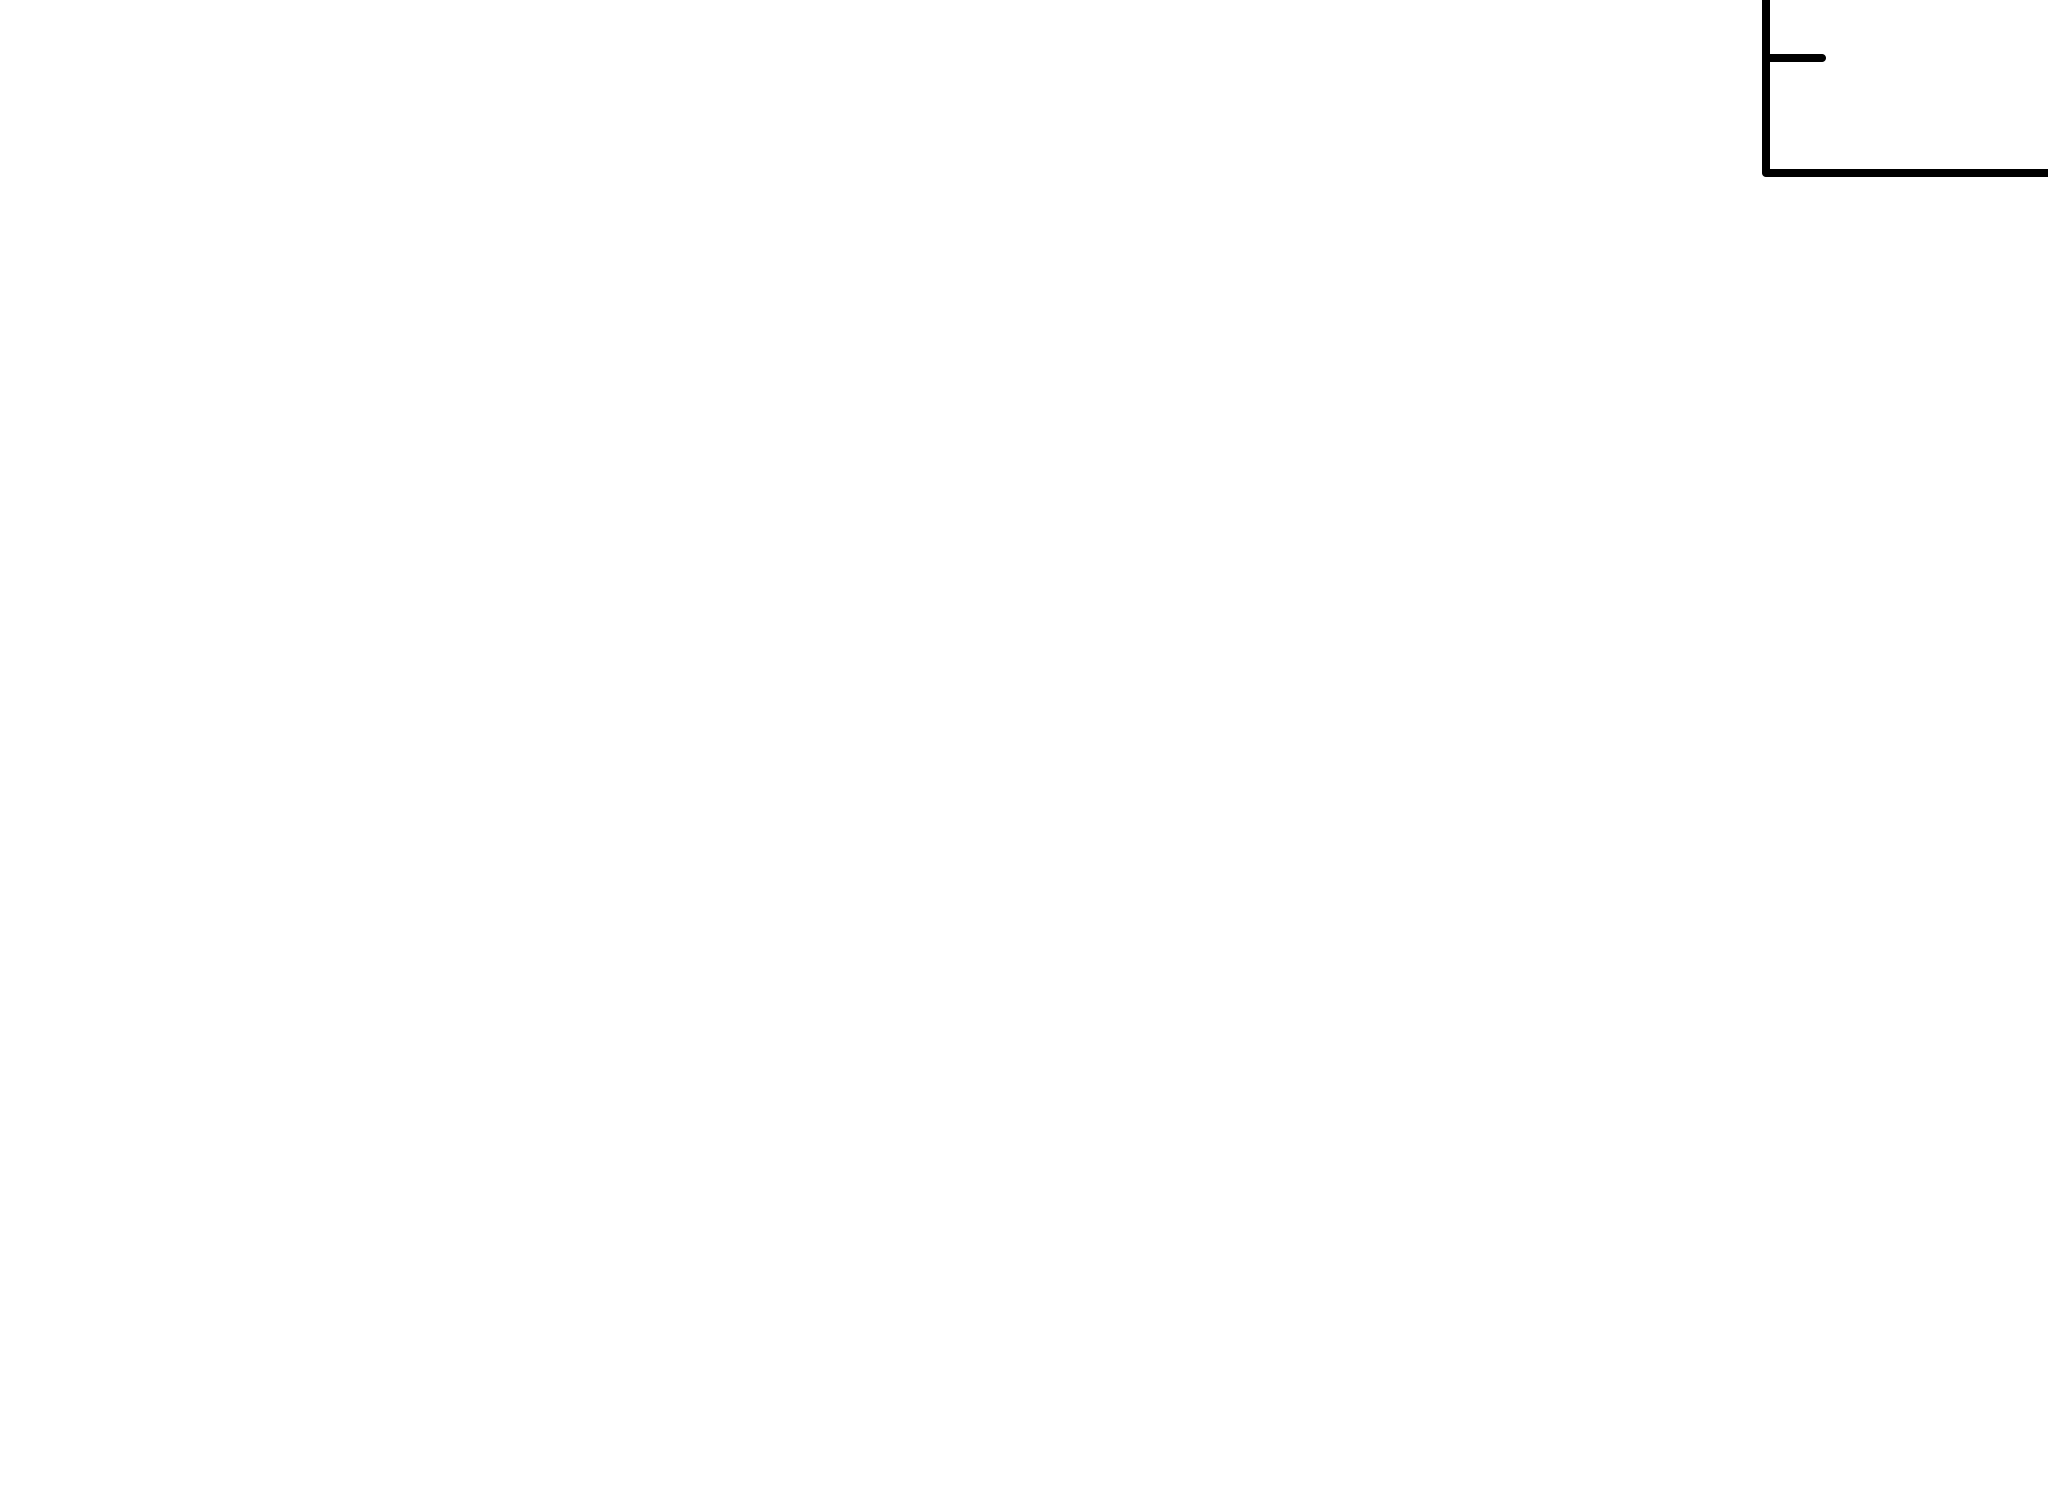

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.794756      3.27233    (-1.09584,1.38174)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 64
     2      1.65089            0    (-1.60157,-3.25246)



Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.618820e+11     using 9 bins.

Test statistic : Chi-Squared              8.618820e+11     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
43.3821      2.18206       0      0.310474       3.06020   7.64984e-06
38.6412      361981       -1     0.0423404       2.81418   5.73929e-06
30.5832      813779       -2    0.00311121       1.23253   2.76523e-06
8.11

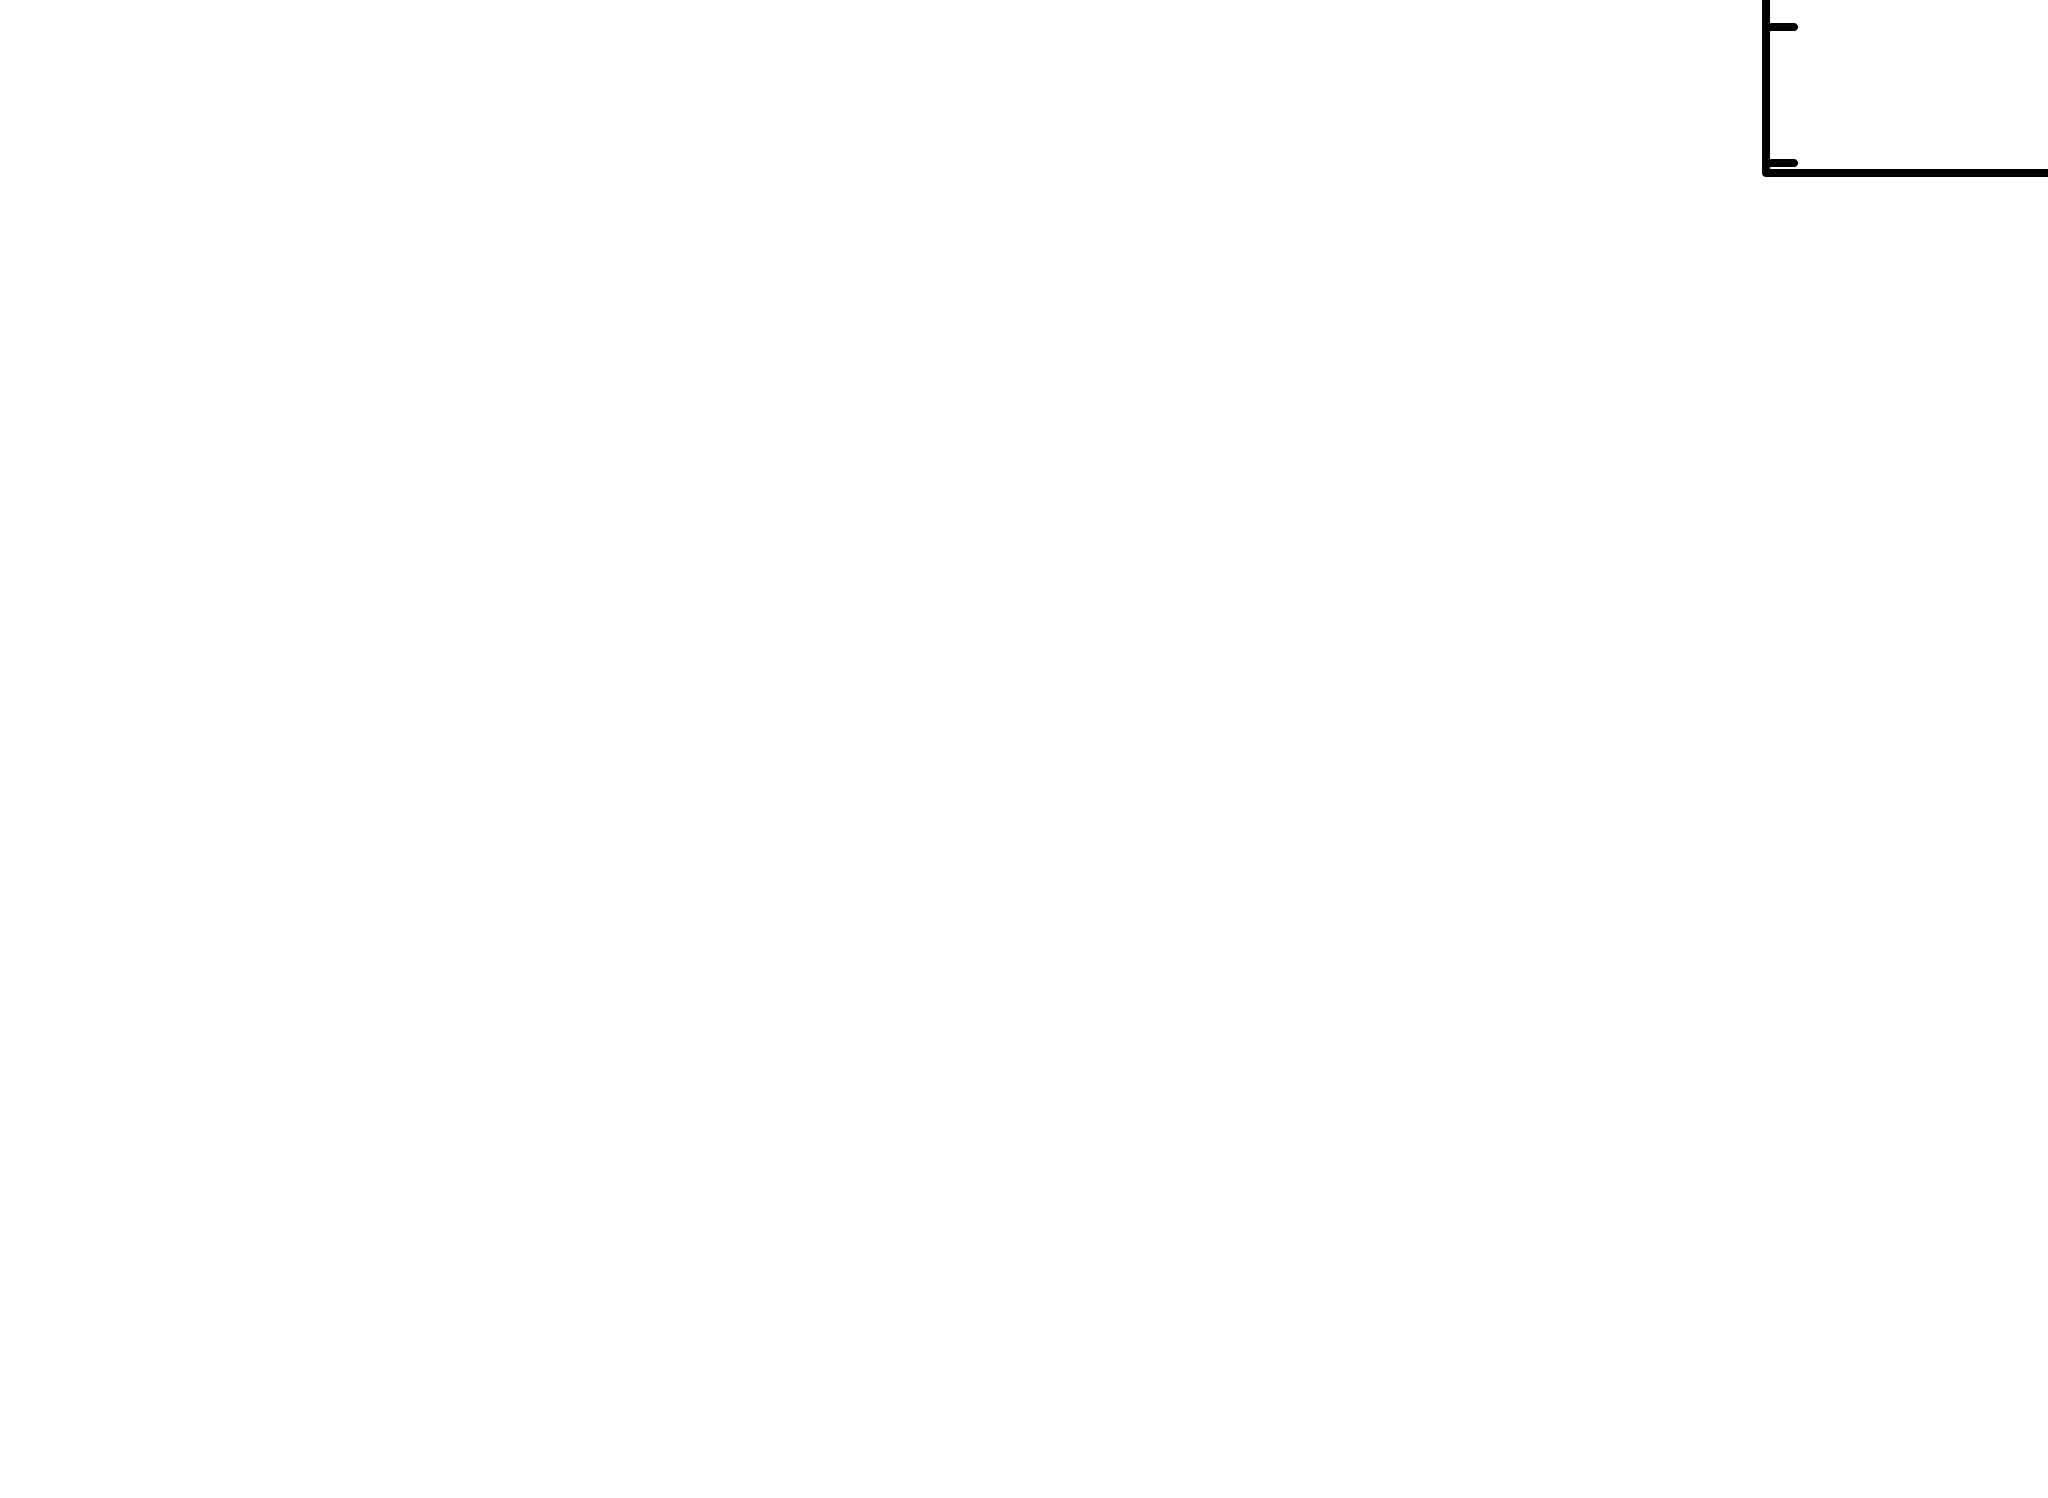

In [10]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.166858      1.70494    (-0.457667,1.08041)
 Parameter   Confidence Range (2.706)
     2     0.672815      1.16792    (-0.22532,0.269786)


In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.8159e-05 photons (1.3862e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
plx = 0.9566
d_kpc = 1/plx
F_x = 1.3865*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.812343872052952e+31


In [14]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.0453690152623876
31.258240603697427


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.68)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.4099032091947575e-13
F_x / F_opt:  -0.007269425156057702


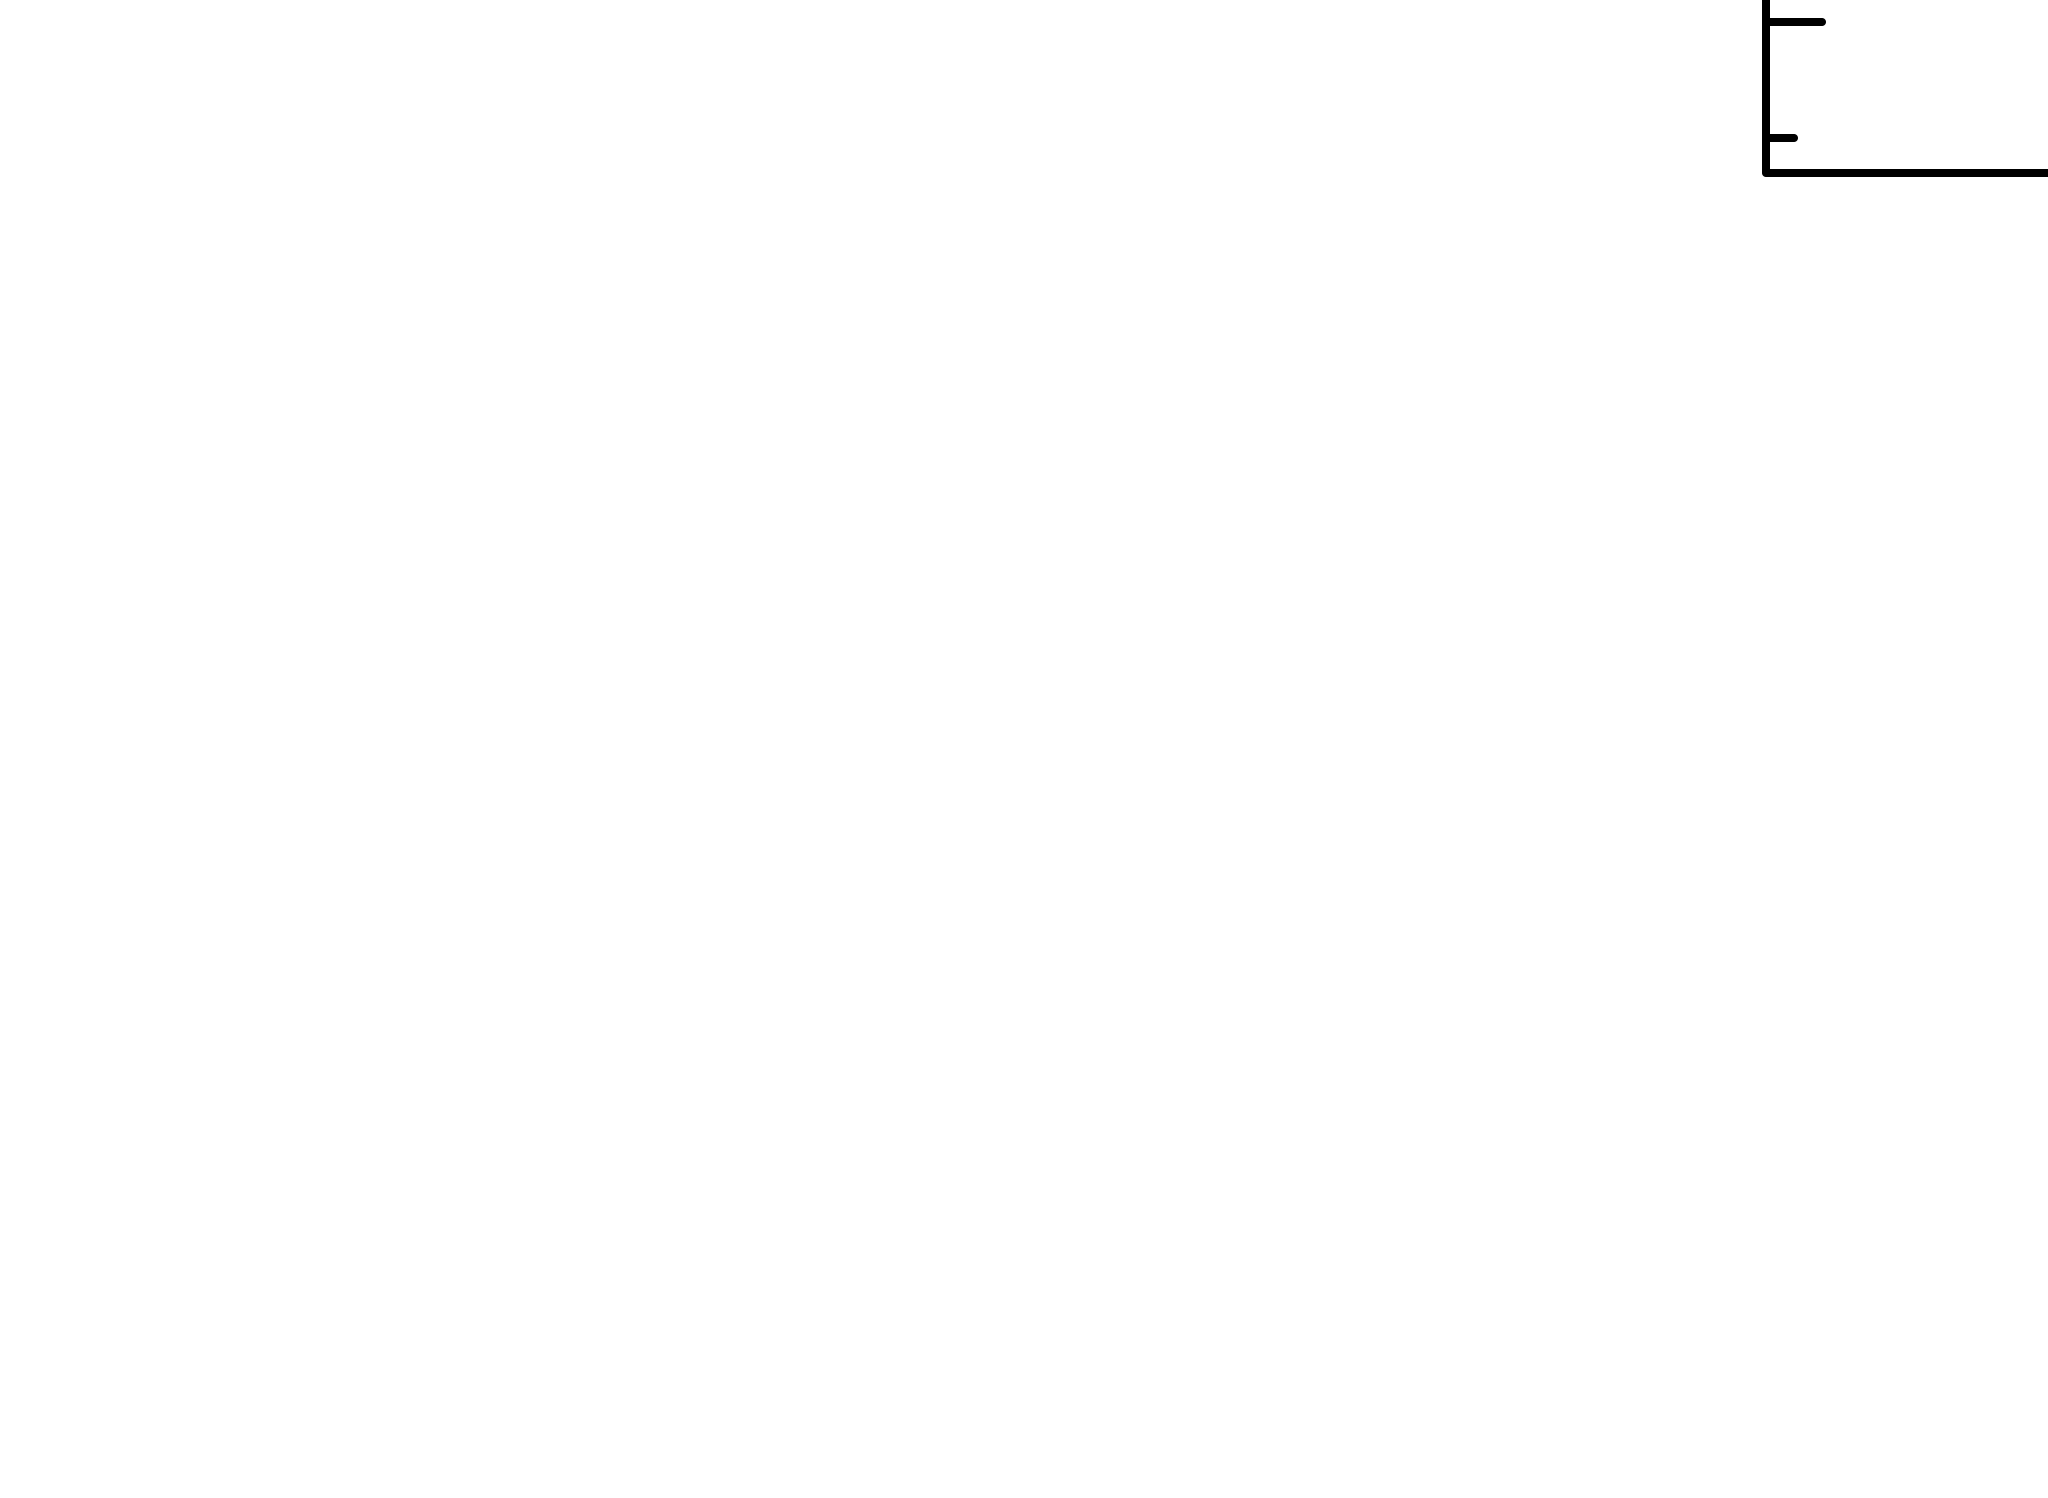


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.342778e+10     using 9 bins.

Test statistic : Chi-Squared              1.342778e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.276718e+09     using 9 bins.

Test statistic : Chi-Squared              2.276718e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees o

In [16]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.350992e+09     using 9 bins.

Test statistic : Chi-Squared              8.350992e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.635066e+09     using 9 bins.

Test statistic : Chi-Squared              1.635066e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degree

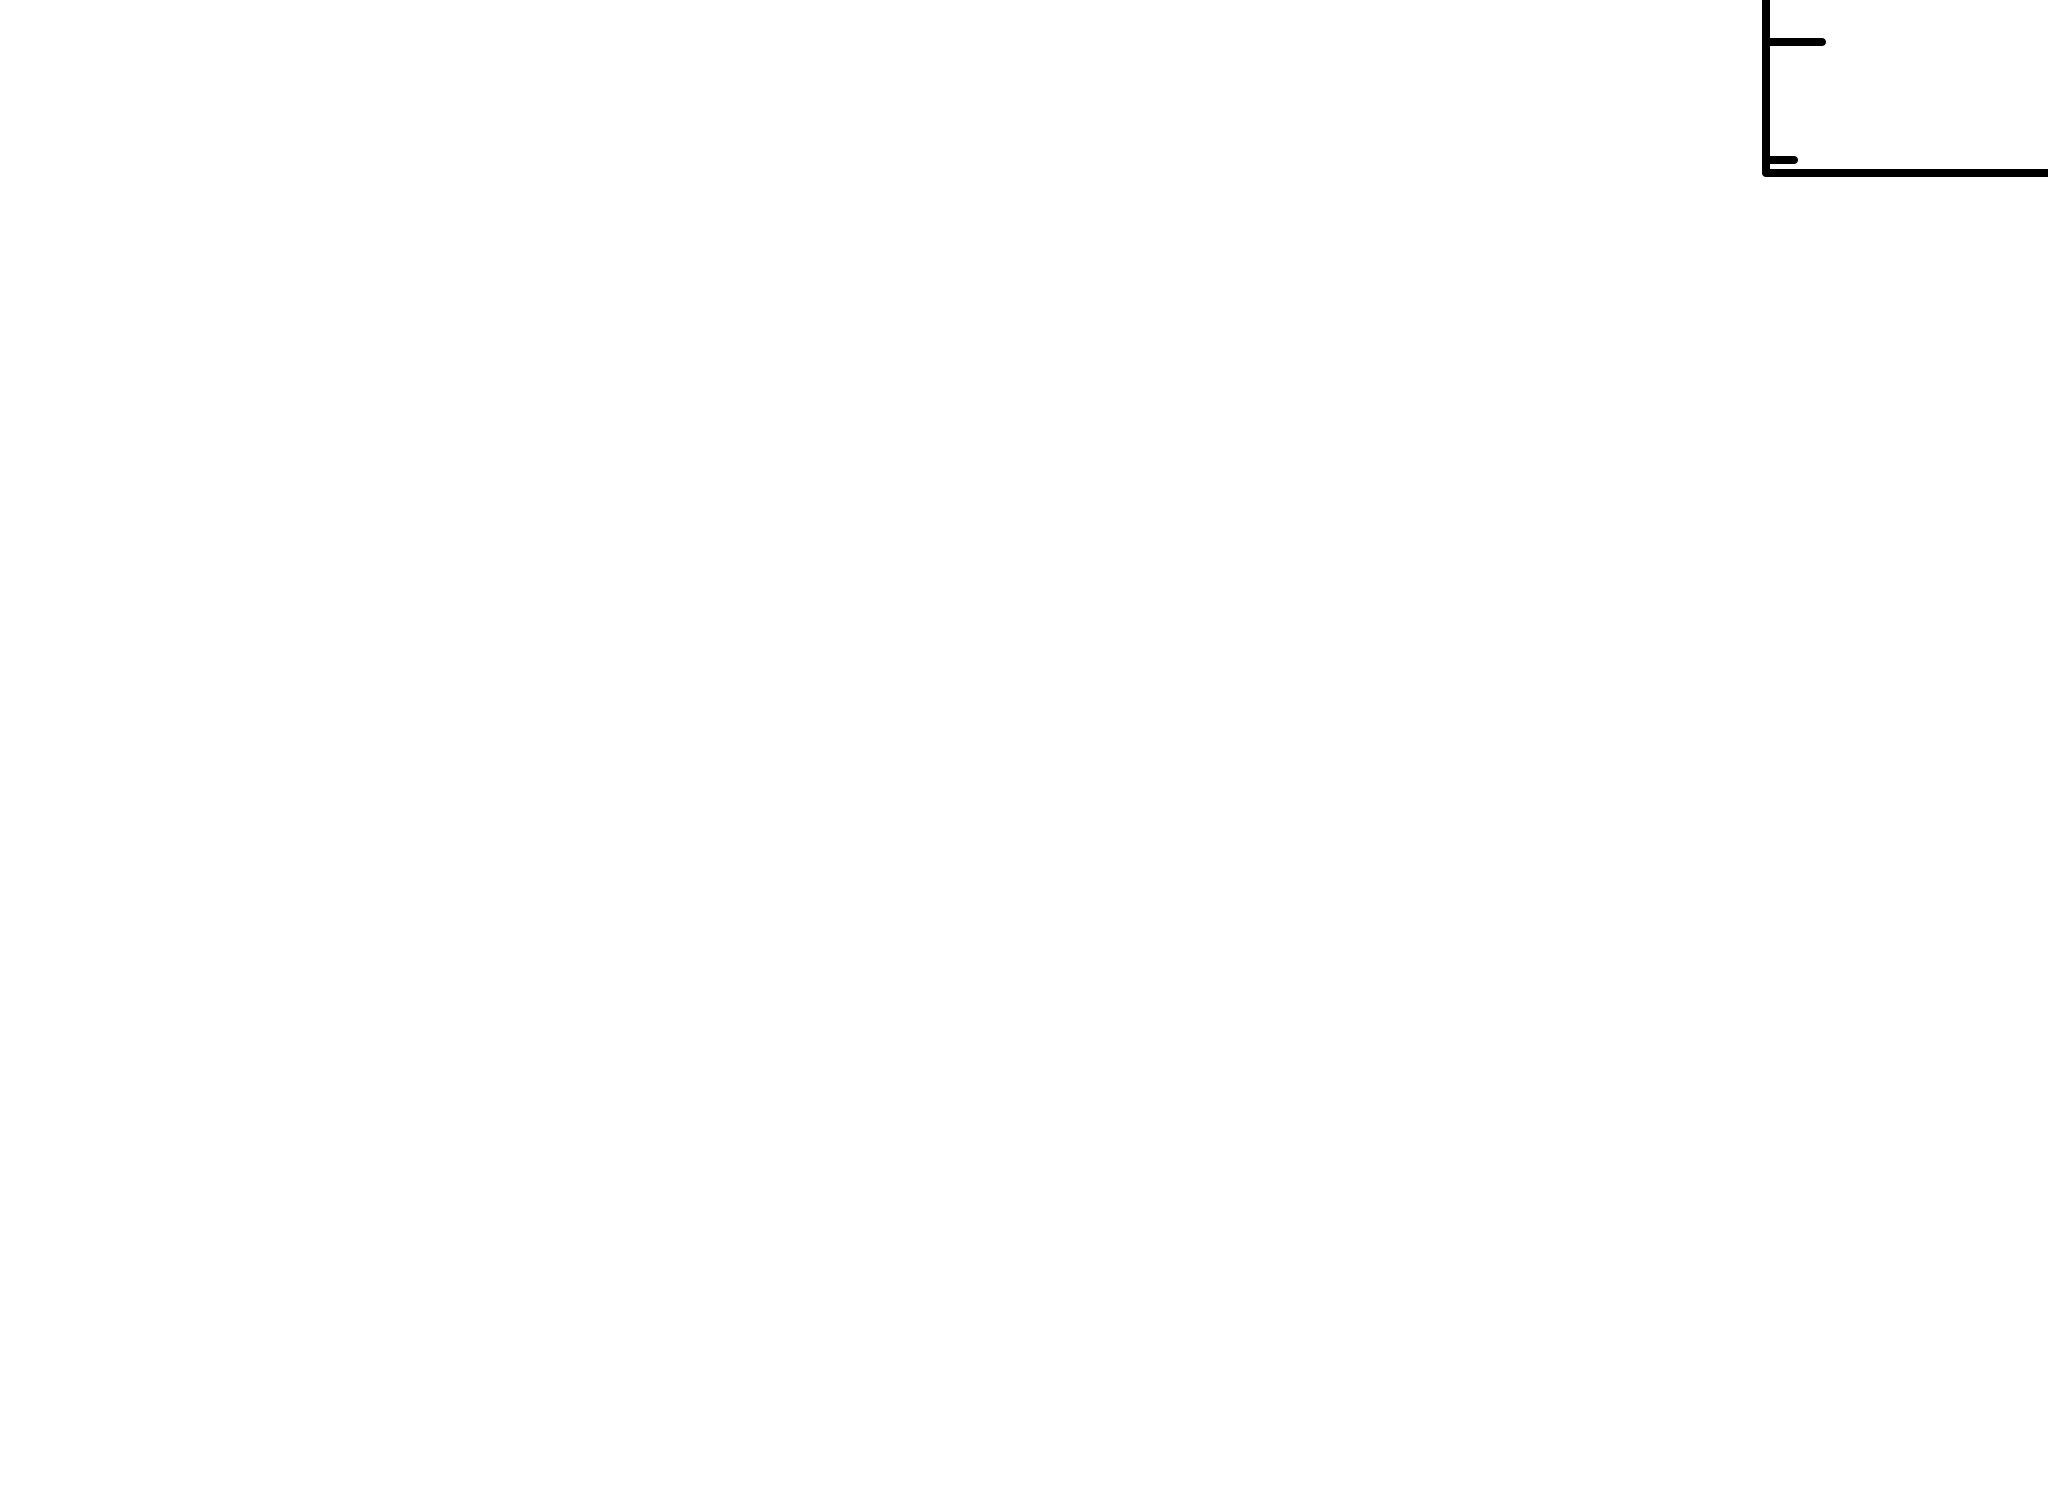

In [17]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")

In [18]:
Fit.error("1")
Fit.error("2")

out_arr[4,0] = 'raymond'
out_arr[4,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[4,13] = mo.raymond.Abundanc.values[0]
out_arr[4,4:7] = mo.raymond.kT.values[0], mo.raymond.kT.values[0] - mo.raymond.kT.error[0], mo.raymond.kT.error[1] - mo.raymond.kT.values[0]
out_arr[4,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.769223      3.18193    (-0.962632,1.45008)
 Parameter   Confidence Range (2.706)
***Warning: Parameter pegged at hard limit: 64
     2      1.60292            0    (-2.11068,-3.7136)


In [19]:
np.savetxt('../spec25_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')
